## Data - Classification - Abrupt - Mixed (Gama 2004)

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(13)

v = np.random.choice([False,True], size=20000)
w = np.random.choice([False,True], size=20000)

x = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.1,0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125], size=20000)
z = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.1,0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125], size=20000)

r1 = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.1,0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125], size=20000)
r2 = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.1,0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125], size=20000)

### Concept Drifts

1. @ [5000:7500]: x and z with p now [0.05,0.025,0.025,0.1,0.3,0.1,0.1,0.1,0.1,0.05,0.05]
2. @ [10000:12500]: x and z with p now [0.1,0.05,0.5,0.05,0.025,0.025,0.1,0.3,0.1,0.1,0.1]
3. @ [15000:17500]: x and z with p now [0.1,0.1,0.1,0.1,0.05,0.5,0.05,0.025,0.025,0.1,0.3]

In [3]:
#Validation Drift
x[2000:3000] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=1000)
z[2000:3000] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=1000)

# Drift 1
x[7000:9000] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2000)
z[7000:9000] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2000)

#Drift 2
r1[10000:12500] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2500)
r2[10000:12500] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2500)

#Drift 3

x[17500:] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2500)
z[17500:] = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1,0.7,0.1,0.0125,0.0125], size=2500)



In [4]:
condition1 = v & w
condition2 = v | w
condition3 = z < 0.5 + 0.3 * np.sin(3*np.pi*x)

y = np.where(condition1 | (condition2 & condition3),np.ones(20000, dtype=np.int8), np.zeros(20000, dtype=np.int8))

In [5]:
data = pd.DataFrame([v,w,x,z,r1,r2,y]).transpose()
data.columns = ['x1','x2','x3','x4', 'x5', 'x6', 'y']
data['y'] = data['y'].astype('int32')

data['x1'] = data['x1'].astype(int)
data['x2'] = data['x2'].astype(int)
data['x3'] = data['x3'].astype(float)
data['x4'] = data['x4'].astype(float)
data['x5'] = data['x5'].astype(float)
data['x6'] = data['x6'].astype(float)

In [6]:
data.head()

,x1,x2,x3,x4,x5,x6,y
0,0,0,0.1,0.9,0.5,0.1,0
1,0,1,0.1,0.1,0.1,0.1,1
2,0,0,0.2,0.1,0.1,0.1,0
3,0,0,0.1,0.7,0.1,0.1,0
4,0,0,0.1,0.0,0.1,0.1,0


In [7]:
data.to_csv('mixed_classification_3_drift_paper.csv', index=False)

In [8]:
import matplotlib.pyplot as plt

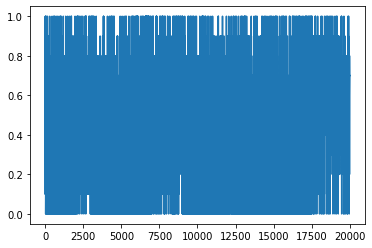

In [9]:
plt.plot(data['x3'])

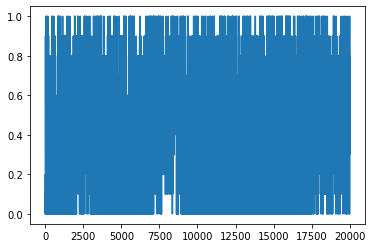

In [10]:
plt.plot(data['x4'])

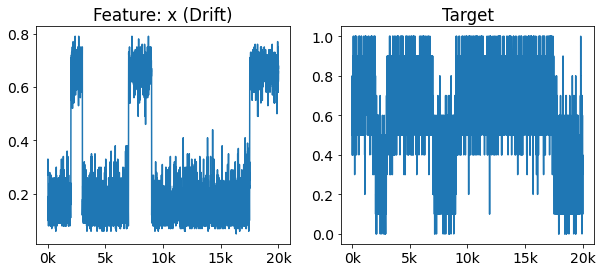

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].plot(data['x3'].rolling(10).mean())
ax[0].set_title('Feature: x (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



ax[1].plot(data['y'].rolling(10).mean())
ax[1].set_title('Target')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('mixed_abrupt.png', bbox_inches='tight', dpi=300)